<h1 align="center">Factors Relating to Levee Failures on the Lower Mississippi River</h1>

In [1]:
import numpy as np
import pandas as pd
%pylab inline
pylab.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


Description: Factors relating to presence/absence of a levee failure at a site on lower Mississippi River, with predictors:

    Site underlain by coarse-grain channel fill (sediment)
    Borrow pit indicator
    Meander location (1=Inside bend, 2=outside bend, 3=chute, 4=straight)
    channel width
    floodway width
    constriction factor
    land cover type (1=open water, 2=grassy, 3=agricultural, 4=forest)
    vegetative buffer width
    channel sinuosity 
    dredging intensity
    bank revetement


Variables/Columns:

    Failure   8  /* 1=Yes, 0=No  */
    year  12-16
    river mile   18-24
    sediments   32
    borrow pit    40
    meander     48
    channel width 50-56
    floodway width  58-64
    constriction factor  66-72
    land cover     80
    veg width    82-88
    sinuosity   90-96
    dredging    98-104
    revetement   112


In [30]:
url = 'http://www.stat.ufl.edu/~winner/data/lmr_levee.dat'

data_df = pd.read_csv(url, sep='[\s]+', engine='python', header=None)

In [31]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 14 columns):
0     82 non-null int64
1     82 non-null int64
2     82 non-null float64
3     82 non-null int64
4     82 non-null int64
5     82 non-null int64
6     82 non-null float64
7     82 non-null float64
8     82 non-null float64
9     82 non-null int64
10    82 non-null float64
11    82 non-null float64
12    82 non-null int64
13    82 non-null int64
dtypes: float64(6), int64(8)
memory usage: 9.0 KB


In [32]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1890,847.0,0,0,4,1347.00,2025.54,1.0,4,391.31,1.9484,0,0
1,1,1890,787.0,1,0,3,2580.99,4122.89,1.0,2,150.63,2.3318,0,0
2,1,1890,776.0,1,0,3,3378.96,7998.81,1.0,4,145.15,1.9238,0,0
3,1,1890,776.0,1,0,3,3507.43,8537.52,1.0,2,301.95,2.0305,0,0
4,1,1890,773.0,1,0,2,1704.10,4173.75,1.0,2,1027.68,1.5503,0,0


In [23]:
col_str = """Failure
year
river mile
sediments
borrow pit
meander
channel width
floodway width
constriction factor
land cover
veg width
sinuosity
dredging
revetement"""

col_names = [c.replace(' ', '_').lower() for c in col_str.split('\n')]

In [34]:
data_df.columns = col_names

In [35]:
data_df.head()

,failure,year,river_mile,sediments,borrow_pit,meander,channel_width,floodway_width,constriction_factor,land_cover,veg_width,sinuosity,dredging,revetement
0,1,1890,847.0,0,0,4,1347.00,2025.54,1.0,4,391.31,1.9484,0,0
1,1,1890,787.0,1,0,3,2580.99,4122.89,1.0,2,150.63,2.3318,0,0
2,1,1890,776.0,1,0,3,3378.96,7998.81,1.0,4,145.15,1.9238,0,0
3,1,1890,776.0,1,0,3,3507.43,8537.52,1.0,2,301.95,2.0305,0,0
4,1,1890,773.0,1,0,2,1704.10,4173.75,1.0,2,1027.68,1.5503,0,0


In [36]:
data_df['year'].value_counts()

1937    42
1910    30
1890    10
Name: year, dtype: int64

In [38]:
data_df['revetement'].value_counts()

0    80
1     2
Name: revetement, dtype: int64

In [39]:
data_df['failure'].value_counts()

1    41
0    41
Name: failure, dtype: int64

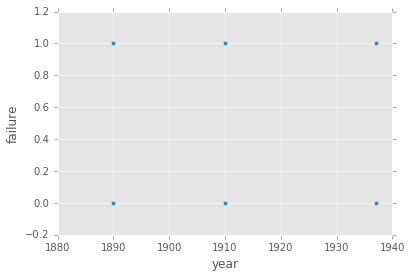

In [40]:
data_df.plot(kind='scatter', x='year', y='failure')

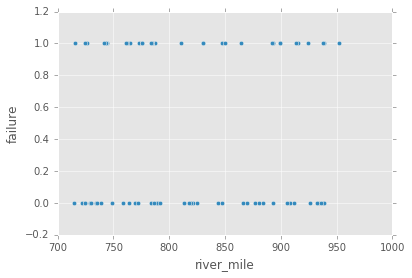

In [41]:
data_df.plot(kind='scatter', x='river_mile', y='failure')

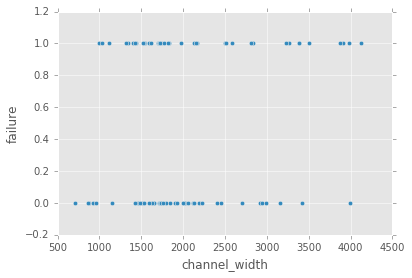

In [42]:
data_df.plot(kind='scatter', x='channel_width', y='failure')

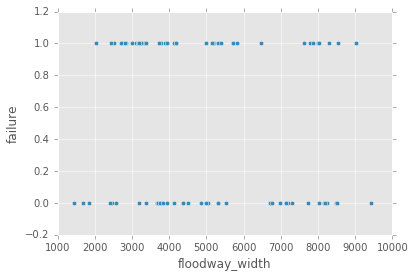

In [43]:
data_df.plot(kind='scatter', x='floodway_width', y='failure')

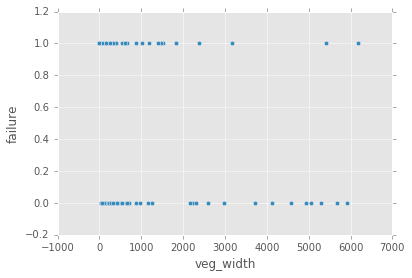

In [44]:
data_df.plot(kind='scatter', x='veg_width', y='failure')

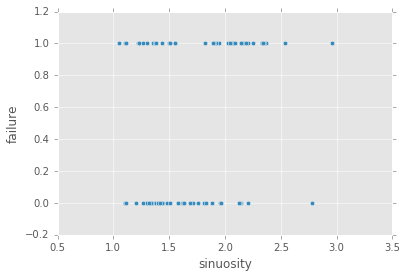

In [45]:
data_df.plot(kind='scatter', x='sinuosity', y='failure')

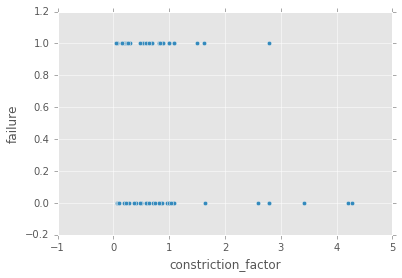

In [48]:
data_df.plot(kind='scatter', x='constriction_factor', y='failure')

In [70]:
from sklearn.feature_selection import chi2, SelectKBest

cat_cols = data_df.dtypes[data_df.dtypes == np.int64].index
cat_cols = [c for c in cat_cols if  c not in ('failure', 'dredging', 'revetement')]
target = data_df['failure']

cat_features = data_df[cat_cols]

selector = SelectKBest(chi2, k=5)
selector.fit(X=cat_features, y=target)

feature_imp = pd.Series(data=selector.scores_, index=cat_cols)
feature_imp.sort_values(ascending=False)

borrow_pit    1.684211
land_cover    1.246154
sediments     0.380952
meander       0.000000
year          0.000000
dtype: float64

In [73]:
t = data_df[['river_mile', 'channel_width', 'floodway_width', 'constriction_factor', 'veg_width', 'sinuosity']]
t.corrwith(data_df['failure'])

river_mile             0.009705
channel_width          0.190817
floodway_width        -0.135839
constriction_factor   -0.240798
veg_width             -0.207859
sinuosity              0.252649
dtype: float64

In [78]:
import statsmodels.formula.api as sm

model = sm.logit(formula='failure ~ sinuosity + constriction_factor + C(borrow_pit) + C(land_cover)', data=data_df)
result = model.fit(method='lbfgs', maxiter=100)


result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                failure   No. Observations:                   82
Model:                          Logit   Df Residuals:                       75
Method:                           MLE   Df Model:                            6
Date:                Tue, 18 Apr 2017   Pseudo R-squ.:                  0.1752
Time:                        21:41:05   Log-Likelihood:                -46.882
converged:                       True   LL-Null:                       -56.838
                                        LLR p-value:                  0.002872
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              15.7446   1232.898      0.013      0.990   -2400.691    2432.180
C(borrow_pit)[T.1]     -0.8954      0.541     -1.654      0.098      -1.957       0.166
C(land_cover)[T.2]    -16.0115   1232.897     -0.013      0.990   -2432.446    2400.423
C(land_cover)[T.3]    -16.4094   1232.897     -0.013      0.989   -2432.844    2400.025
C(land_cover)[T.4]    -16.4040   1232.897     -0.013      0.989   -2432.838    2400.030
sinuosity               0.8438      0.607      1.390      0.164      -0.346       2.033
constriction_factor    -0.7200      0.445     -1.619      0.105      -1.592       0.152
=======================================================================================
"""

In [89]:
from sklearn.model_selection import KFold

fold = KFold(n_splits=5, shuffle=True)

formula='failure ~ sinuosity + constriction_factor + C(borrow_pit) + C(land_cover)'

def cross_validate(train_index, test_index):
    train_data, test_data = data_df.iloc[train_index], data_df.iloc[test_index]
    
    t_model = sm.logit(formula=formula, data=train_data)
    t_result = t_model.fit(method='lbfgs', maxiter=100)
    t_predict = t_result.predict(test_data)
    t_predict = t_predict.apply(lambda v: 1.0 if v >= 0.5 else 0.0)
    
    return pd.concat({'predicted': t_predict, 'actual': test_data['failure']}, axis=1)

cv_results = [cross_validate(train_index, test_index) 
              for train_index, test_index in fold.split(data_df.index)]

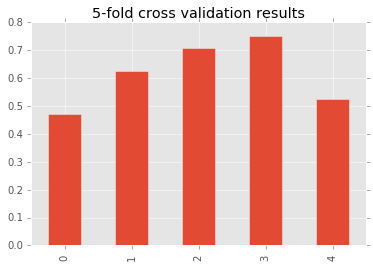

In [91]:
from sklearn.metrics import f1_score

scores = [f1_score(r['predicted'], r['actual']) for r in cv_results]
sc = pd.Series(data=scores, name='F1_scores')
sc.plot(kind='bar', title='5-fold cross validation results')